In [1]:
import numpy as np
import xarray as xr
import json
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import metpy.calc as mcalc
from metpy.units import units
import metpy
import pygrib
import importlib

In [31]:
import sys
sys.path.append("/home/takato/Git/jma_radar/")
import jma_gsm
import custom_colormap

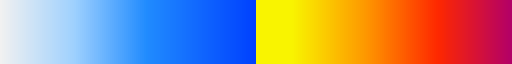

In [32]:
cmap=custom_colormap.get_jmacmap2()
cmap

In [47]:
importlib.reload(jma_gsm)

<module 'jma_gsm' from '/home/takato/Git/jma_radar/jma_gsm.py'>

In [39]:
gsm=jma_gsm.GSM_global()

In [40]:
ds_sfc=gsm.read_sfc("/home/takato/Data/JMA/GSM/Z__C_RJTD_20210801000000_GSM_GPV_Rgl_FD0012_grib2.bin",product_type="FCT")

In [41]:
ds_sfc

<xarray.Dataset>
Dimensions:             (lat: 141, lon: 301)
Coordinates:
  * lat                 (lat) float64 70.0 69.5 69.0 68.5 ... 1.5 1.0 0.5 0.0
  * lon                 (lon) float64 60.0 60.5 61.0 61.5 ... 209.0 209.5 210.0
Data variables:
    pmsl                (lat, lon) float64 1.001e+05 1.001e+05 ... 1.011e+05
    ps                  (lat, lon) float64 9.97e+04 1e+05 ... 1.011e+05
    u10                 (lat, lon) float64 -6.737 -7.566 ... -6.566 -6.378
    v10                 (lat, lon) float64 -2.4 -1.994 -1.228 ... 0.9904 1.069
    T2m                 (lat, lon) float64 283.3 282.4 281.9 ... 299.0 298.9
    rh2m                (lat, lon) float64 86.76 90.08 93.7 ... 77.76 78.29
    Low_cloud_cover     (lat, lon) float64 92.24 16.94 14.5 ... 66.75 59.86
    Medium_cloud_cover  (lat, lon) float64 92.24 16.94 14.5 ... 66.75 59.86
    High_cloud_cover    (lat, lon) float64 78.37 80.18 81.59 ... 1.562 0.0 0.0
    Total_cloud_cover   (lat, lon) float64 96.83 83.5 83.74 ... 66.75 59.86
    precip              (lat, lon) float64 0.125 0.125 0.0625 ... 0.0 0.0 0.0

In [18]:
dslev=gsm.read_plev("/home/takato/Data/JMA/GSM/Z__C_RJTD_20210801000000_GSM_GPV_Rgl_FD0000_grib2.bin")

In [19]:
dslev["T"]

<xarray.DataArray 'T' (level: 9, lat: 141, lon: 301)>
array([[[279.08401489, 279.14651489, 279.70901489, ..., 291.42776489,
         292.20901489, 293.02151489],
        [280.86526489, 280.45901489, 280.52151489, ..., 291.17776489,
         291.95901489, 293.11526489],
        [282.05276489, 281.74026489, 281.58401489, ..., 291.33401489,
         291.92776489, 292.95901489],
        ...,
        [298.67776489, 298.77151489, 298.86526489, ..., 298.61526489,
         298.61526489, 298.58401489],
        [298.70901489, 298.83401489, 298.92776489, ..., 298.61526489,
         298.55276489, 298.49026489],
        [298.80276489, 298.89651489, 298.99026489, ..., 298.74026489,
         298.64651489, 298.55276489]],

       [[280.77844238, 280.77844238, 280.77844238, ..., 285.40344238,
         285.93469238, 286.62219238],
        [280.43469238, 280.46594238, 280.49719238, ..., 285.90344238,
         286.37219238, 287.30969238],
        [281.18469238, 280.96594238, 280.77844238, ..., 286.77844238,
         287.18469238, 287.99719238],
...
        [218.28662109, 218.27099609, 218.25537109, ..., 219.52099609,
         219.48974609, 219.47412109],
        [218.25537109, 218.22412109, 218.19287109, ..., 219.47412109,
         219.47412109, 219.45849609],
        [218.23974609, 218.19287109, 218.16162109, ..., 219.39599609,
         219.45849609, 219.50537109]],

       [[230.2361145 , 230.2048645 , 230.1579895 , ..., 224.9392395 ,
         225.0798645 , 225.1111145 ],
        [229.9392395 , 230.0486145 , 230.1111145 , ..., 224.4861145 ,
         224.3923645 , 224.2048645 ],
        [229.4392395 , 229.5642395 , 229.6892395 , ..., 225.0798645 ,
         224.6111145 , 224.0017395 ],
        ...,
        [206.6111145 , 206.6579895 , 206.7204895 , ..., 206.8923645 ,
         206.7829895 , 206.6892395 ],
        [206.7517395 , 206.7986145 , 206.8923645 , ..., 207.0173645 ,
         206.8923645 , 206.7829895 ],
        [206.8611145 , 206.9079895 , 207.0017395 , ..., 207.1736145 ,
         207.0173645 , 206.8611145 ]]])
Coordinates:
  * level    (level) int64 1000 925 850 700 500 300 250 200 150
  * lat      (lat) float64 70.0 69.5 69.0 68.5 68.0 67.5 ... 2.0 1.5 1.0 0.5 0.0
  * lon      (lon) float64 60.0 60.5 61.0 61.5 62.0 ... 208.5 209.0 209.5 210.0
Attributes:
    title:    Temperature
    units:    kelvin

In [20]:
jma_gsm.GSM_global.add_dew_point_depreession(dslev)
jma_gsm.GSM_global.add_wind_vorticity(dslev)

/home/takato/miniconda3/envs/jupyterlab-debugger/lib/python3.9/site-packages/pint/numpy_func.py:303: RuntimeWarning: divide by zero encountered in log
  result_magnitude = func(*stripped_args, **stripped_kwargs)
/home/takato/miniconda3/envs/jupyterlab-debugger/lib/python3.9/site-packages/pint/quantity.py:1237: RuntimeWarning: invalid value encountered in true_divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


In [21]:
dslev

<xarray.Dataset>
Dimensions:  (lat: 141, level: 9, lon: 301)
Coordinates:
  * level    (level) int64 1000 925 850 700 500 300 250 200 150
  * lat      (lat) float64 70.0 69.5 69.0 68.5 68.0 67.5 ... 2.0 1.5 1.0 0.5 0.0
  * lon      (lon) float64 60.0 60.5 61.0 61.5 62.0 ... 208.5 209.0 209.5 210.0
Data variables:
    hgt      (level, lat, lon) float64 19.35 20.1 20.6 ... 1.424e+04 1.424e+04
    u        (level, lat, lon) float64 -1.667 -1.729 -1.854 ... -9.219 -9.156
    v        (level, lat, lon) float64 0.1331 0.4456 0.7268 ... -2.54 -2.54
    T        (level, lat, lon) float64 279.1 279.1 279.7 ... 207.2 207.0 206.9
    w        (level, lat, lon) float64 -0.02415 -0.004619 ... -0.0217 -0.01682
    rh       (level, lat, lon) float64 99.25 99.91 99.91 99.12 ... 0.0 0.0 0.0
    T-Tw     (level, lat, lon) float64 <Quantity([[[1.08966328e-01 1.37212838...
    vo       (level, lat, lon) float64 <Quantity([[[-3.04346842e-05  8.407013...
    wind     (level, lat, lon) float64 1.672 1.786 1.992 ... 9.461 9.562 9.502

In [48]:
wmap=jma_gsm.Wheather_map()

(<Figure size 1440x864 with 1 Axes>,
 <GeoAxesSubplot:title={'center':'850hPa'}>)

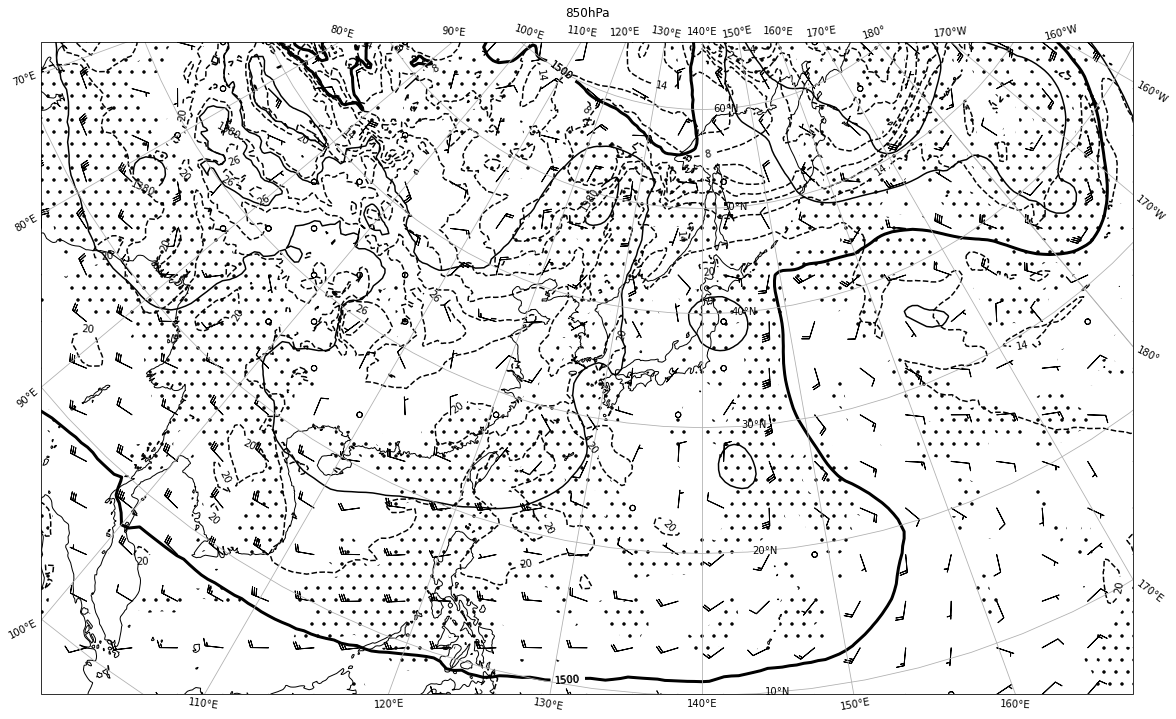

In [23]:
wmap.plot_850hPa_map(dslev)

(<Figure size 1440x864 with 1 Axes>,
 <GeoAxesSubplot:title={'center':'700hPa'}>)

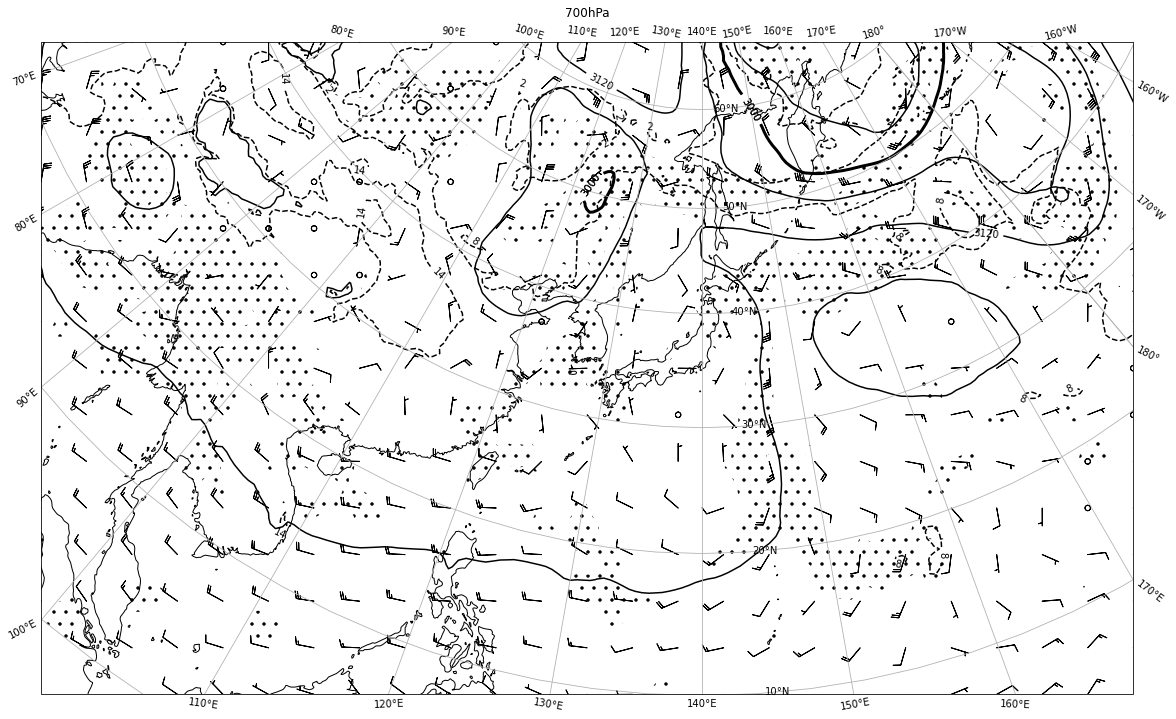

In [24]:
wmap.plot_700hPa_map(dslev)

(<Figure size 1440x864 with 1 Axes>, <GeoAxesSubplot:>)

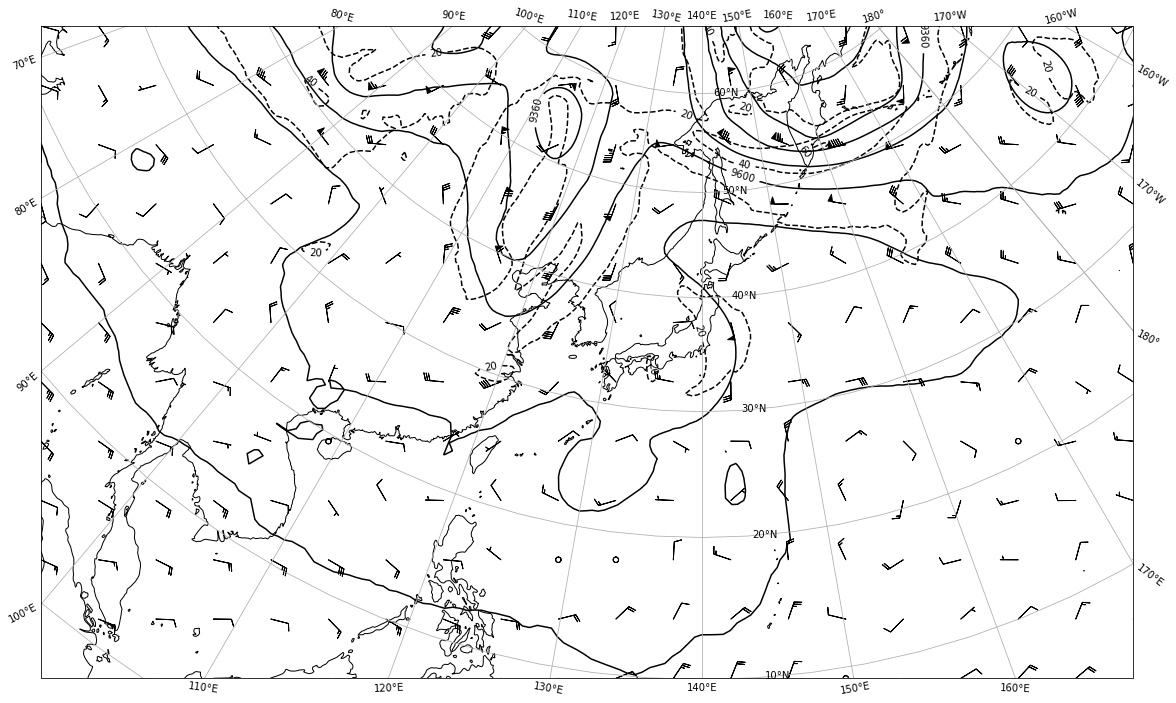

In [28]:
wmap.plot_300hPa_map(dslev)

(<Figure size 1440x864 with 1 Axes>, <GeoAxesSubplot:>)

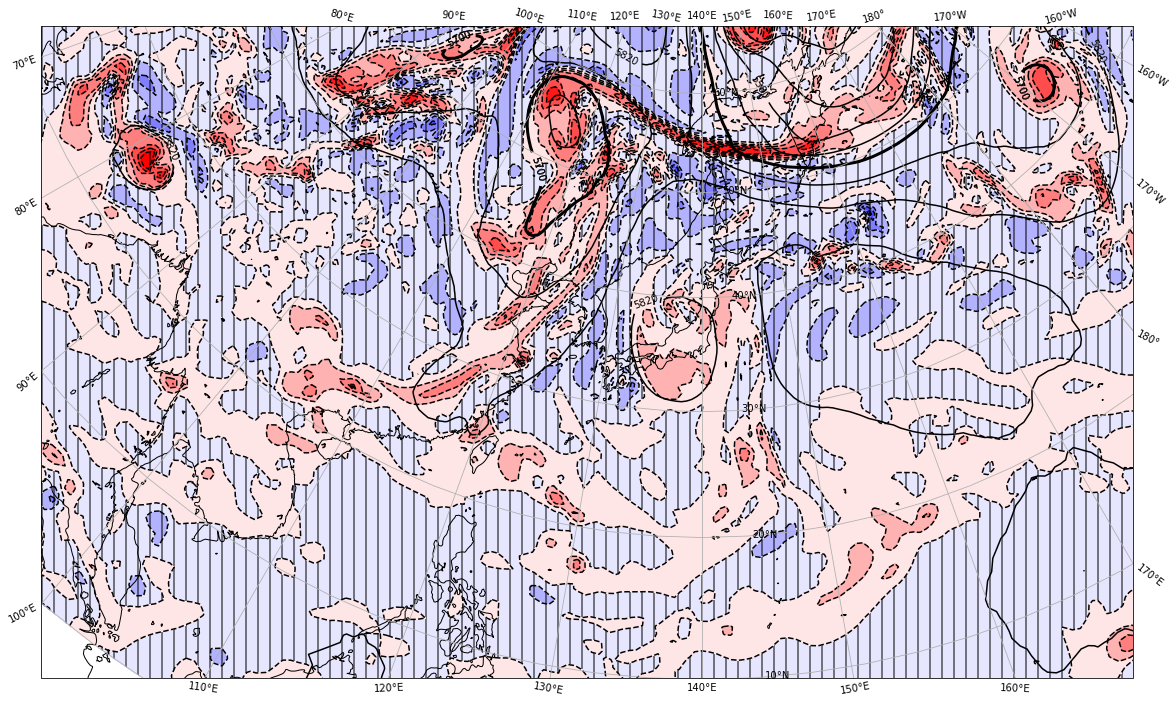

In [29]:
wmap.plot_500hPa_vo_map(dslev)

(<Figure size 1440x864 with 1 Axes>, <GeoAxesSubplot:>)

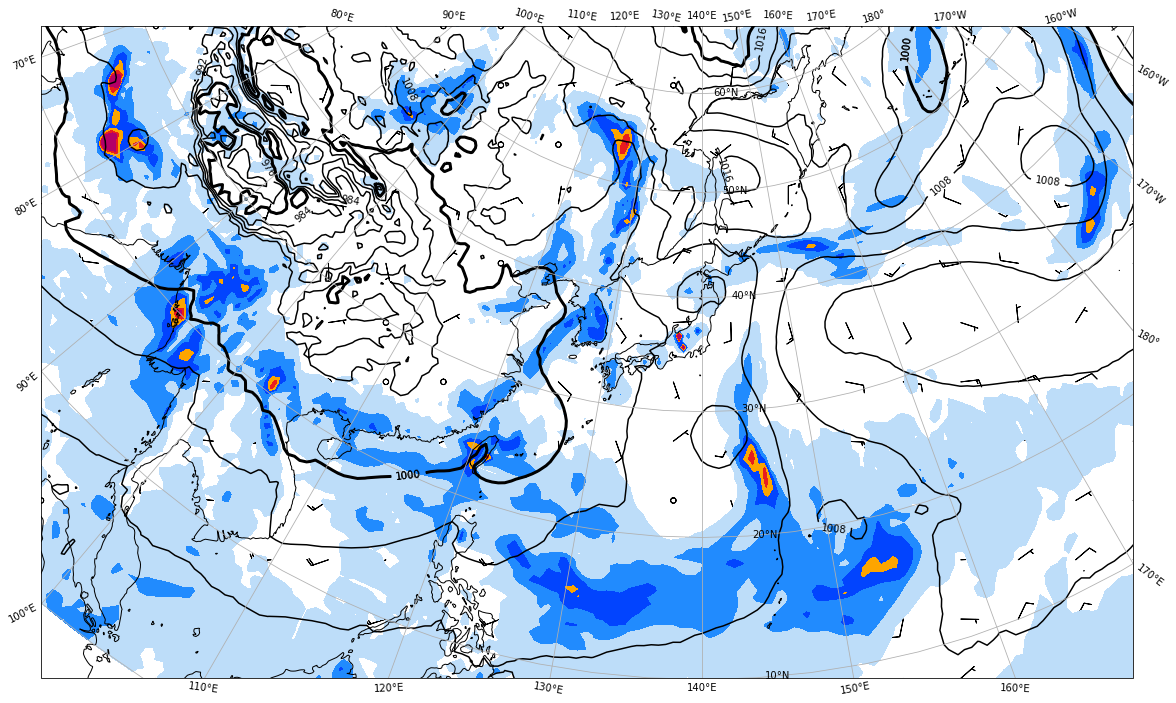

In [49]:
wmap.plot_surface_ps_wind_precip(ds_sfc,cmap=cmap)

In [44]:
ds_sfc

<xarray.Dataset>
Dimensions:             (lat: 141, lon: 301)
Coordinates:
  * lat                 (lat) float64 70.0 69.5 69.0 68.5 ... 1.5 1.0 0.5 0.0
  * lon                 (lon) float64 60.0 60.5 61.0 61.5 ... 209.0 209.5 210.0
Data variables:
    pmsl                (lat, lon) float64 1.001e+05 1.001e+05 ... 1.011e+05
    ps                  (lat, lon) float64 9.97e+04 1e+05 ... 1.011e+05
    u10                 (lat, lon) float64 -6.737 -7.566 ... -6.566 -6.378
    v10                 (lat, lon) float64 -2.4 -1.994 -1.228 ... 0.9904 1.069
    T2m                 (lat, lon) float64 283.3 282.4 281.9 ... 299.0 298.9
    rh2m                (lat, lon) float64 86.76 90.08 93.7 ... 77.76 78.29
    Low_cloud_cover     (lat, lon) float64 92.24 16.94 14.5 ... 66.75 59.86
    Medium_cloud_cover  (lat, lon) float64 92.24 16.94 14.5 ... 66.75 59.86
    High_cloud_cover    (lat, lon) float64 78.37 80.18 81.59 ... 1.562 0.0 0.0
    Total_cloud_cover   (lat, lon) float64 96.83 83.5 83.74 ... 66.75 59.86
    precip              (lat, lon) float64 0.125 0.125 0.0625 ... 0.0 0.0 0.0